# Báo cáo Đồ án Song song hóa và tối ưu hóa một ứng dụng
- Thông tin nhóm
  - Lê Thanh Hiếu - 1712434
  - Nguyễn Văn Tuấn - 1512638
  - Phan Hữu Tú - 1712861

- Đề tài: **Thay đổi kích thước ảnh bằng Seam Carving**

In [1]:
# import image file from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/My Drive/LTSSUD/gpu-python')
!ls

images	__pycache__  README.md	report_cpu.ipynb  seam_carving.py  test.py


In [3]:
from IPython.display import Image

In [4]:
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

## 1. Mô tả ứng dụng
- **Input**: một tấm ảnh (RGB)
- **Output**: một tấm ảnh mới được thay đổi kích thước (không chỉ cho chiều rộng mà còn cho chiều cao, không chỉ thu nhỏ mà còn phóng to) từ tấm ảnh gốc mà không làm biến dạng các đối tượng quan trọng.

- Ý nghĩa thực tế khi sử dụng?
- Ứng dụng này có cần tăng tốc không?
- **Usage**:
```
usage: seam_carving.py [-h] [-mode MODE] [-dy DY] [-dx DX] -in IN -out OUT
```

## 2. Cài đặt tuần tự

### 2.1. Vertical Seam Removal Demo

Xóa 300 seams


In [5]:
%%time
!python seam_carving.py -mode cpu -dy 0 -dx -300 -in images/input.jpg -out images/output_remove300seams.jpg

(968, 1428, 3)
seam_carving.py:110: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "remove_seam" failed type inference due to: No implementation of function Function(<built-in function getitem>) found for signature:
 
 >>> getitem(array(float64, 3d, C), array(bool, 3d, C))
 
There are 22 candidate implementations:
  - Of which 20 did not match due to:
  Overload of function 'getitem': File: <numerous>: Line N/A.
    With argument(s): '(array(float64, 3d, C), array(bool, 3d, C))':
   No match.
  - Of which 2 did not match due to:
  Overload in function 'GetItemBuffer.generic': File: numba/core/typing/arraydecl.py: Line 162.
    With argument(s): '(array(float64, 3d, C), array(bool, 3d, C))':
   Rejected as the implementation raised a specific error:
     TypeError: unsupported array index type array(bool, 3d, C) in [array(bool, 3d, C)]
  raised from /usr/local/lib/python3.7/dist-packages/numba/core/typing/arraydecl.py:69

During: typi

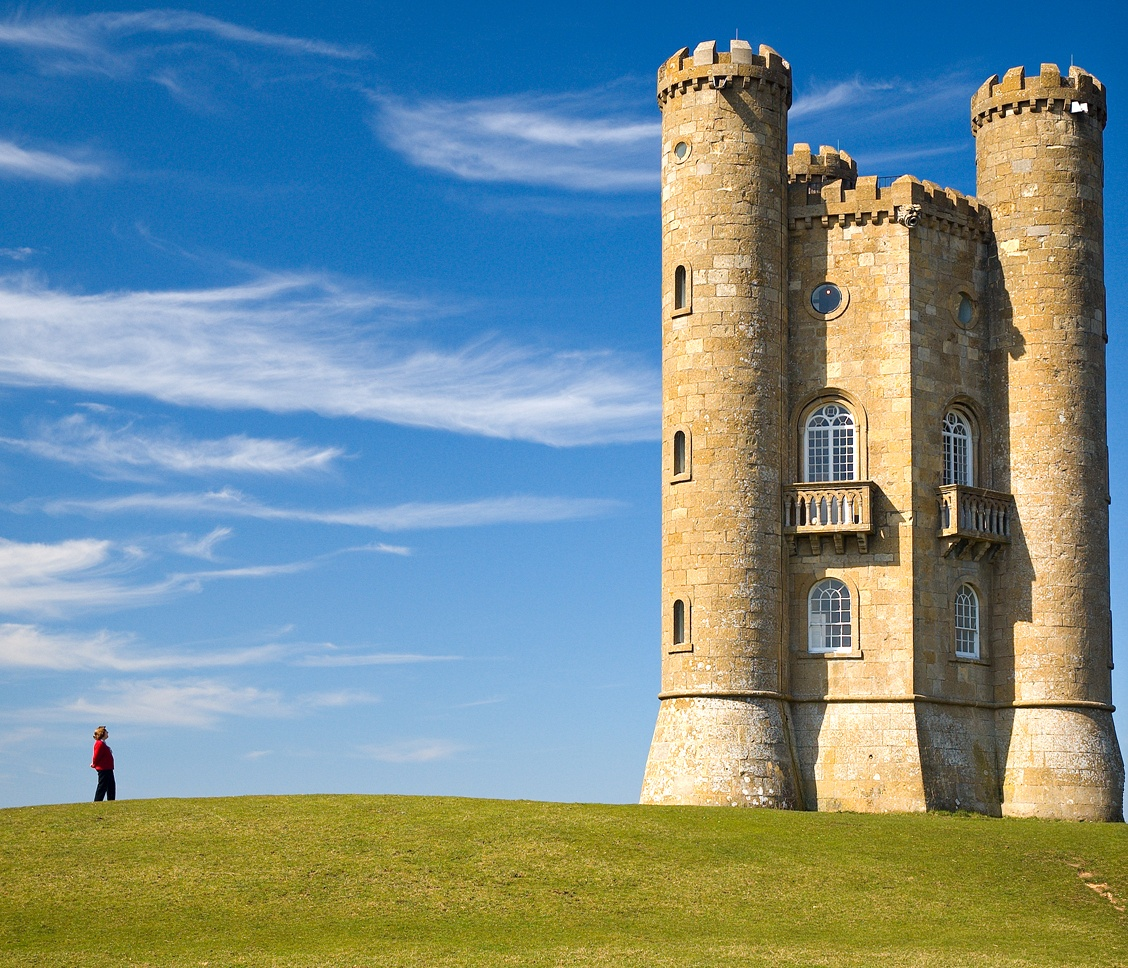

In [6]:
Image('images/output_remove300seams.jpg')

Xóa 500 seams

In [7]:
%%time
!python seam_carving.py -mode cpu -dy 0 -dx -500 -in images/input.jpg -out images/output_remove500seams.jpg

(968, 1428, 3)
seam_carving.py:110: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "remove_seam" failed type inference due to: No implementation of function Function(<built-in function getitem>) found for signature:
 
 >>> getitem(array(float64, 3d, C), array(bool, 3d, C))
 
There are 22 candidate implementations:
  - Of which 20 did not match due to:
  Overload of function 'getitem': File: <numerous>: Line N/A.
    With argument(s): '(array(float64, 3d, C), array(bool, 3d, C))':
   No match.
  - Of which 2 did not match due to:
  Overload in function 'GetItemBuffer.generic': File: numba/core/typing/arraydecl.py: Line 162.
    With argument(s): '(array(float64, 3d, C), array(bool, 3d, C))':
   Rejected as the implementation raised a specific error:
     TypeError: unsupported array index type array(bool, 3d, C) in [array(bool, 3d, C)]
  raised from /usr/local/lib/python3.7/dist-packages/numba/core/typing/arraydecl.py:69

During: typi

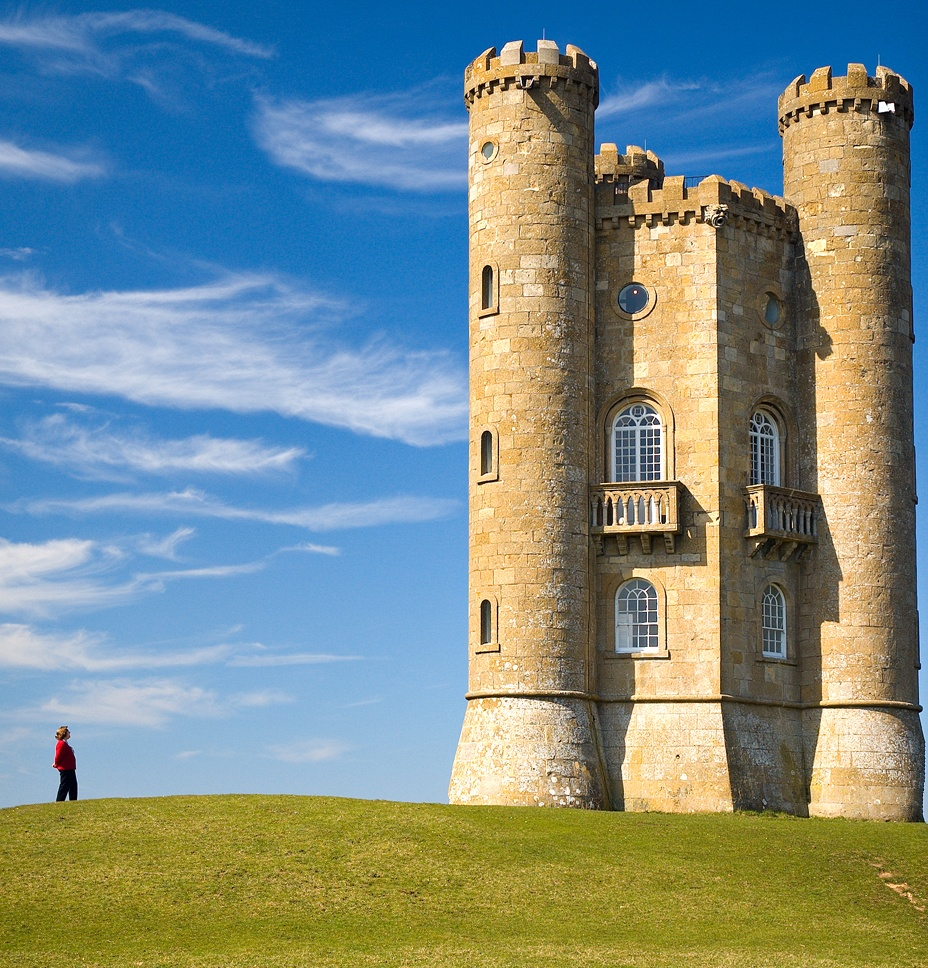

In [8]:
Image('images/output_remove500seams.jpg')

Xóa 1000 seams

In [9]:
%%time
!python seam_carving.py -mode cpu -dy 0 -dx -1000 -in images/input.jpg -out images/output_remove1000seams.jpg

(968, 1428, 3)
seam_carving.py:110: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "remove_seam" failed type inference due to: No implementation of function Function(<built-in function getitem>) found for signature:
 
 >>> getitem(array(float64, 3d, C), array(bool, 3d, C))
 
There are 22 candidate implementations:
  - Of which 20 did not match due to:
  Overload of function 'getitem': File: <numerous>: Line N/A.
    With argument(s): '(array(float64, 3d, C), array(bool, 3d, C))':
   No match.
  - Of which 2 did not match due to:
  Overload in function 'GetItemBuffer.generic': File: numba/core/typing/arraydecl.py: Line 162.
    With argument(s): '(array(float64, 3d, C), array(bool, 3d, C))':
   Rejected as the implementation raised a specific error:
     TypeError: unsupported array index type array(bool, 3d, C) in [array(bool, 3d, C)]
  raised from /usr/local/lib/python3.7/dist-packages/numba/core/typing/arraydecl.py:69

During: typi

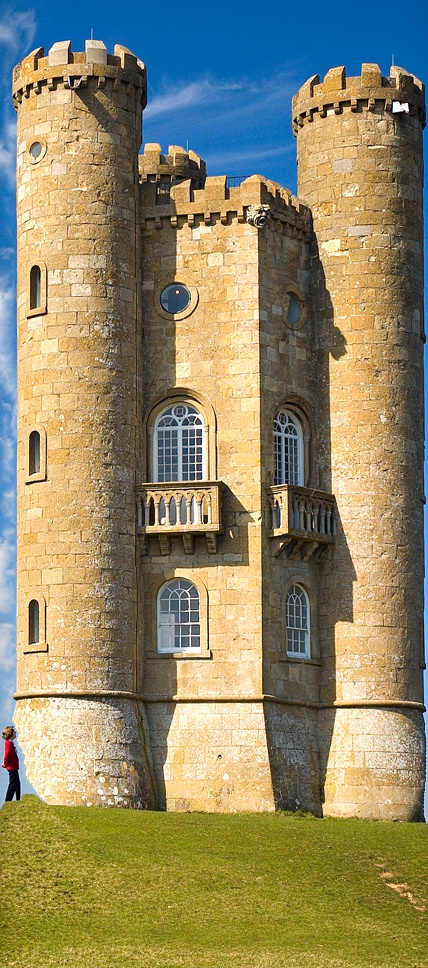

In [10]:
Image('images/output_remove1000seams.jpg')

### 2.2. Horizontal Seam Removal Demo

Xóa 300 seams

In [11]:
%%time
!python seam_carving.py -mode cpu -dy -300 -dx 0 -in images/input.jpg -out images/output_remove300seams_by_rows.jpg

(968, 1428, 3)
seam_carving.py:110: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "remove_seam" failed type inference due to: No implementation of function Function(<built-in function getitem>) found for signature:
 
 >>> getitem(array(float64, 3d, A), array(bool, 3d, C))
 
There are 22 candidate implementations:
  - Of which 20 did not match due to:
  Overload of function 'getitem': File: <numerous>: Line N/A.
    With argument(s): '(array(float64, 3d, A), array(bool, 3d, C))':
   No match.
  - Of which 2 did not match due to:
  Overload in function 'GetItemBuffer.generic': File: numba/core/typing/arraydecl.py: Line 162.
    With argument(s): '(array(float64, 3d, A), array(bool, 3d, C))':
   Rejected as the implementation raised a specific error:
     TypeError: unsupported array index type array(bool, 3d, C) in [array(bool, 3d, C)]
  raised from /usr/local/lib/python3.7/dist-packages/numba/core/typing/arraydecl.py:69

During: typi

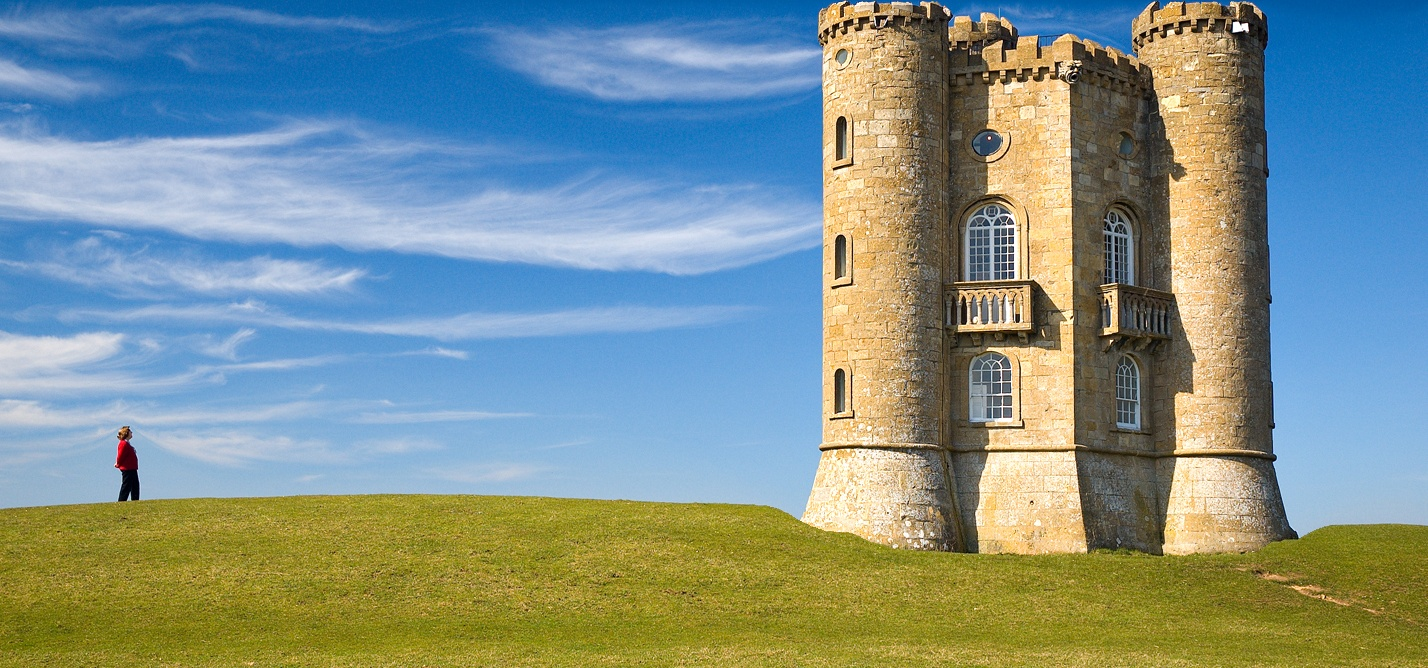

In [12]:
Image('images/output_remove300seams_by_rows.jpg')

Xóa 500 seams

In [13]:
%%time
!python seam_carving.py -mode cpu -dy -500 -dx 0 -in images/input.jpg -out images/output_remove500seams_by_rows.jpg

(968, 1428, 3)
seam_carving.py:110: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "remove_seam" failed type inference due to: No implementation of function Function(<built-in function getitem>) found for signature:
 
 >>> getitem(array(float64, 3d, A), array(bool, 3d, C))
 
There are 22 candidate implementations:
  - Of which 20 did not match due to:
  Overload of function 'getitem': File: <numerous>: Line N/A.
    With argument(s): '(array(float64, 3d, A), array(bool, 3d, C))':
   No match.
  - Of which 2 did not match due to:
  Overload in function 'GetItemBuffer.generic': File: numba/core/typing/arraydecl.py: Line 162.
    With argument(s): '(array(float64, 3d, A), array(bool, 3d, C))':
   Rejected as the implementation raised a specific error:
     TypeError: unsupported array index type array(bool, 3d, C) in [array(bool, 3d, C)]
  raised from /usr/local/lib/python3.7/dist-packages/numba/core/typing/arraydecl.py:69

During: typi

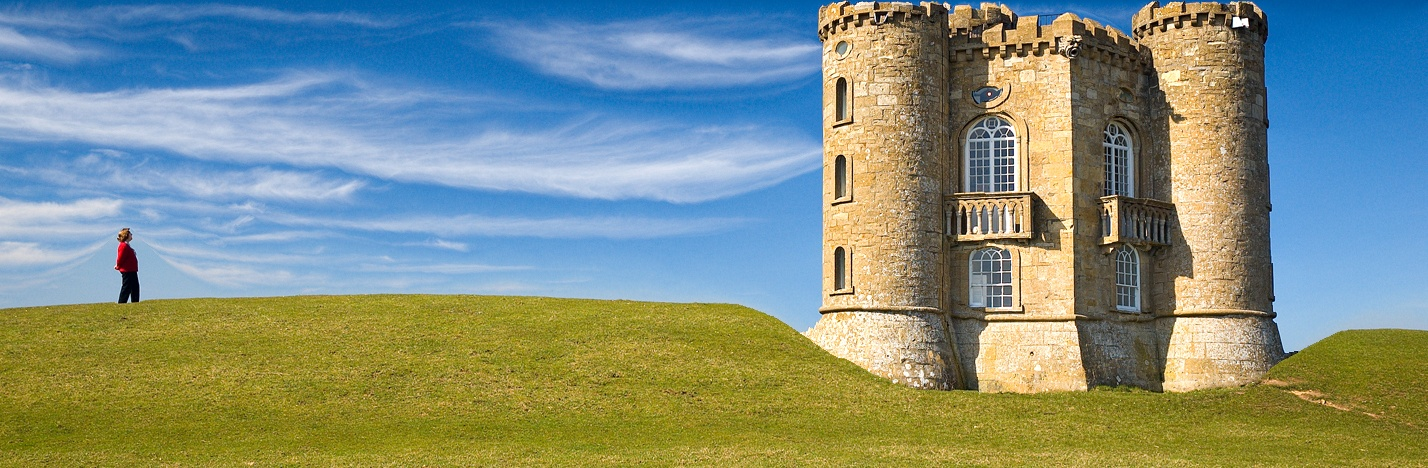

In [14]:
Image('images/output_remove500seams_by_rows.jpg')

### 2.3. Vertical Seam Insertion Demo

Chèn 300 seams

In [64]:
%%time
!python seam_carving.py -mode cpu -dy 0 -dx 300 -in images/input.jpg -out images/output_insert300seams.jpg

(968, 1428, 3)
seam_carving.py:110: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "remove_seam" failed type inference due to: No implementation of function Function(<built-in function getitem>) found for signature:
 
 >>> getitem(array(float64, 3d, C), array(bool, 3d, C))
 
There are 22 candidate implementations:
  - Of which 20 did not match due to:
  Overload of function 'getitem': File: <numerous>: Line N/A.
    With argument(s): '(array(float64, 3d, C), array(bool, 3d, C))':
   No match.
  - Of which 2 did not match due to:
  Overload in function 'GetItemBuffer.generic': File: numba/core/typing/arraydecl.py: Line 162.
    With argument(s): '(array(float64, 3d, C), array(bool, 3d, C))':
   Rejected as the implementation raised a specific error:
     TypeError: unsupported array index type array(bool, 3d, C) in [array(bool, 3d, C)]
  raised from /usr/local/lib/python3.7/dist-packages/numba/core/typing/arraydecl.py:69

During: typi

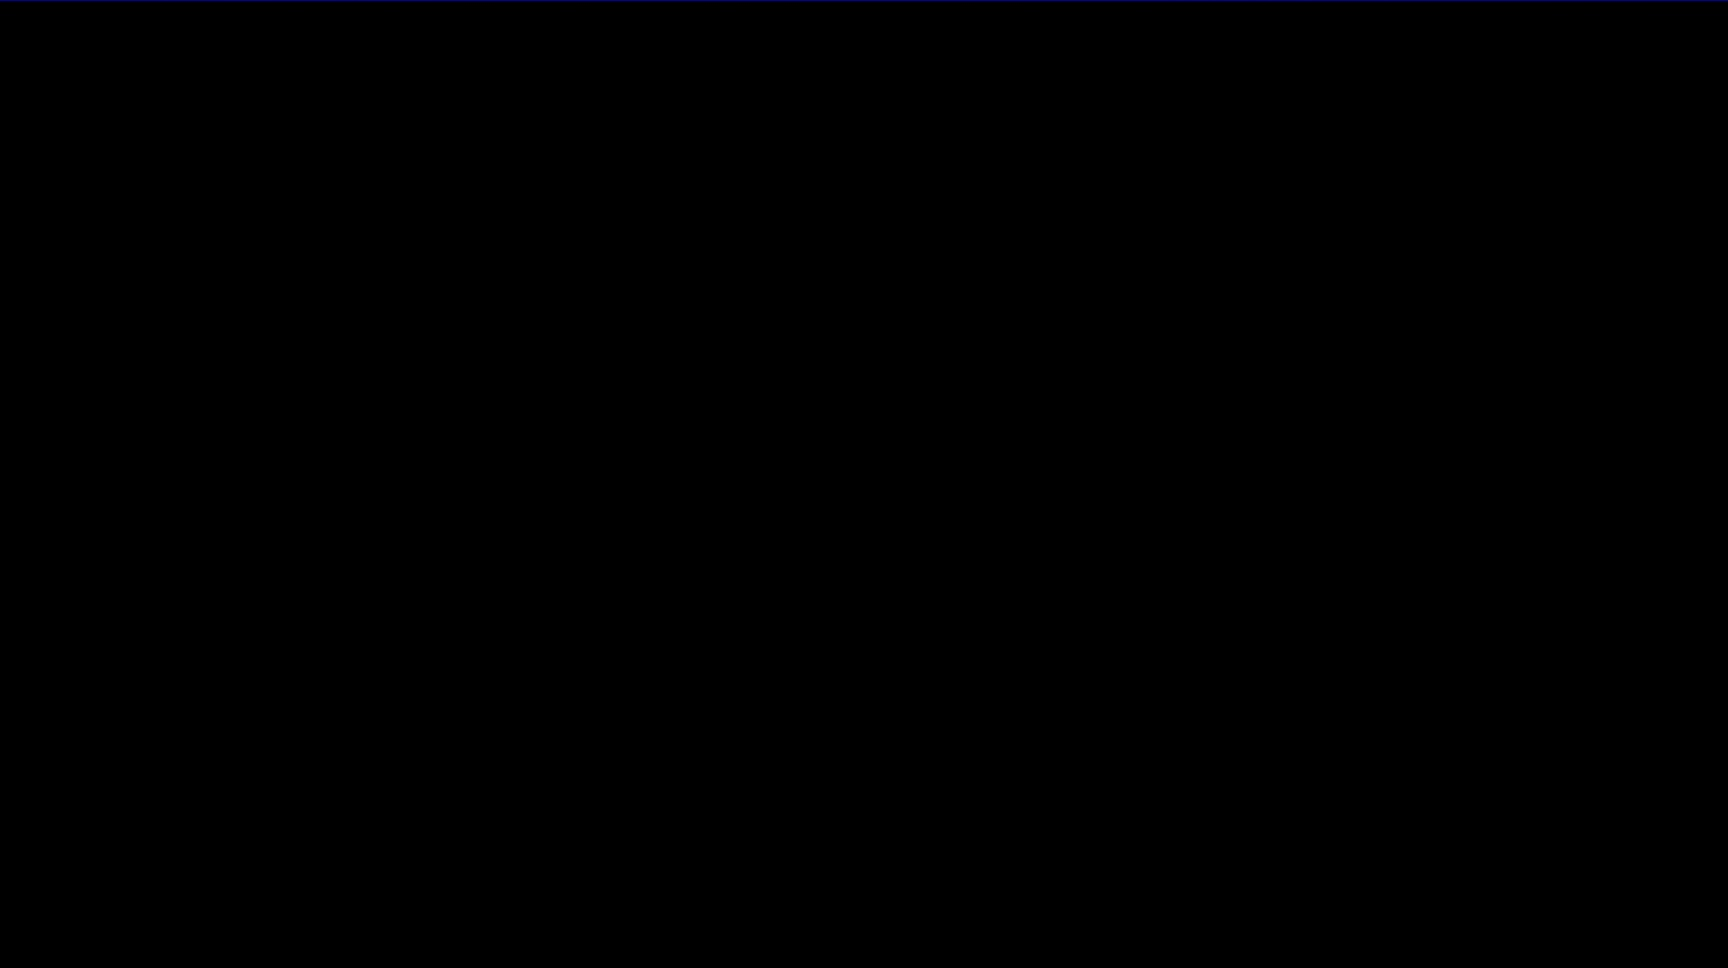

In [65]:
Image('images/output_insert300seams.jpg')

Chèn 500 seams

In [ ]:
%%time
!python seam_carving.py -mode cpu -dy 0 -dx 500 -in images/input.jpg -out images/output_insert500seams.jpg

(968, 1428, 3)
seam_carving.py:110: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "remove_seam" failed type inference due to: No implementation of function Function(<built-in function getitem>) found for signature:
 
 >>> getitem(array(float64, 3d, C), array(bool, 3d, C))
 
There are 22 candidate implementations:
  - Of which 20 did not match due to:
  Overload of function 'getitem': File: <numerous>: Line N/A.
    With argument(s): '(array(float64, 3d, C), array(bool, 3d, C))':
   No match.
  - Of which 2 did not match due to:
  Overload in function 'GetItemBuffer.generic': File: numba/core/typing/arraydecl.py: Line 162.
    With argument(s): '(array(float64, 3d, C), array(bool, 3d, C))':
   Rejected as the implementation raised a specific error:
     TypeError: unsupported array index type array(bool, 3d, C) in [array(bool, 3d, C)]
  raised from /usr/local/lib/python3.7/dist-packages/numba/core/typing/arraydecl.py:69

During: typi

In [ ]:
Image('images/output_insert500seams.jpg')

Chèn 1000 seams

In [ ]:
%%time
!python seam_carving.py -mode cpu -dy 0 -dx 1000 -in images/input.jpg -out images/output_insert1000seams.jpg

In [ ]:
Image('images/output_insert1000seams.jpg')

### 2.4. Horizontal Seam Insertion Demo

Chèn 300 seams

In [ ]:
%%time
!python seam_carving.py -mode cpu -dy 300 -dx 0 -in images/input.jpg -out images/output_insert300seams_by_rows.jpg

In [ ]:
Image('images/output_insert300seams_by_rows.jpg')

Chèn 500 seams

In [ ]:
%%time
!python seam_carving.py -mode cpu -dy 500 -dx 0 -in images/input.jpg -out images/output_insert500seams_by_rows.jpg

In [ ]:
Image('images/output_insert500seams_by_rows.jpg')

## 3. Cài đặt song song (trên GPU)

## 4. Cài đặt song song (trên GPU) + tối ưu hóa

## 5. Nhìn lại quá trình làm đồ án

## 6. Tài liệu tham khảo